# Strava analysis 

In [29]:
import json
import os
import requests
import urllib3
import pandas as pd
import numpy as np

import polyline


Connecting to Strava api

In [95]:
#get variables from config file

with open('config.json') as f:
    data = json.load(f)

client_id = data['client_id']
client_secret = data['client_secret']
refresh_token = data['refresh_token']


In [96]:
client_secret

'c4ea6a4acc8166738af2ba1422ebca0909b8b33d'

In [97]:
# define function to get a new access token
def get_access_token(client_id, client_secret, refresh_token):
    oauth_url = 'https://www.strava.com/oauth/token'

    payload = {
        'client_id': client_id,
        'client_secret': client_secret,
        'refresh_token': refresh_token,
        'grant_type': 'refresh_token',
        'f': 'json',
    }

    r = requests.post(oauth_url, data=payload, verify=False)

    access_token = r.json()['access_token']
    return access_token

# get new access token
access_token = get_access_token(client_id, client_secret, refresh_token)


In [98]:
# accessing all strava activites 

# The first loop, request_page_number will be set to one, so it requests the first page. Increment this number after
# each request, so the next time we request the second page, then third, and so on...
request_page_num = 1
all_activities = []

activities_url = 'https://www.strava.com/api/v3/athlete/activities'
header = {'Authorization': 'Bearer ' + access_token}

while True:
    param = {'per_page': 200, 'page': request_page_num}
    # initial request, where we request the first page of activities
    data = requests.get(activities_url, headers=header, params=param).json()

    # check the response to make sure it is not empty. If it is empty, that means there is no more data left. So if you have
    # 1000 activities, on the 6th request, where we request page 6, there would be no more data left, so we will break out of the loop
    if len(data) == 0:
        print("breaking out of while loop because the response is zero, which means there must be no more activities")
        break

    # if the all_activities list is already populated, that means we want to add additional data to it via extend.
    if all_activities:
        print("all_activities is populated")
        all_activities.extend(data)

    # if the all_activities is empty, this is the first time adding data so we just set it equal to my_dataset
    else:
        print("all_activities is NOT populated")
        all_activities = data

    request_page_num += 1

print("number of activies = " + str(len(all_activities)))


all_activities is NOT populated
all_activities is populated
all_activities is populated
all_activities is populated
breaking out of while loop because the response is zero, which means there must be no more activities
number of activies = 746


In [99]:
# data dictionaries
data_dictionaries = []
for page in data:
    data_dictionaries.extend(page)

In [100]:
# normalize data
activities = pd.json_normalize(data_dictionaries)

# normalize data
activities = pd.json_normalize(all_activities)


In [101]:
activities

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,...,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state
0,2,Lunch Run,9065.0,2389,2394,36.0,Run,Run,NaN,10289708430,...,garmin_ping_306920186932,False,0,0,False,27612131,1,a10289708430,et`yH|u|@AqAKaACgB[wEOeA_@oBa@}CWw@w@yAe@mBuAg...,2
1,2,Morning Run,9040.0,2582,2588,35.0,Run,Run,NaN,10283309044,...,garmin_ping_306727929781,False,0,0,False,27612131,1,a10283309044,at`yHfv|@Ei@@c@CaAMwAI{AMcB_@qCg@mB]gCQq@Ys@W]...,2
2,2,Morning Run,10399.3,3065,3226,107.5,Run,Run,0.0,10277349431,...,garmin_ping_306557433351,False,0,0,False,27612131,1,a10277349431,ct`yHfv|@CkAS}BMwBOyBa@aDq@mEKc@_@iAmAwCg@}ASe...,2
3,2,Morning Run,10649.0,3238,3248,60.0,Run,Run,0.0,10272291576,...,garmin_ping_306388405663,False,0,0,False,27612131,1,a10272291576,it`yHbv|@@kAIcDMkBUcCK_Bw@_FYiAe@sAm@oCe@gAg@a...,2
4,2,Lunch Run,7041.6,1841,1841,2.7,Run,Run,NaN,10267899389,...,garmin_ping_306256787338,False,0,0,False,27612131,1,a10267899389,cv`yHrv|@[oEGIM]Ks@WOi@Iy@VqAj@qDfAC?O_@Ku@CoA...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2,X15 50m hill sprints,1530.3,650,790,2.3,Run,Run,0.0,1537221796,...,1F5621FD-5FFA-41DD-BE94-EAEC824B9E88,False,0,0,False,27612131,1,a1537221796,o_snIpouHTnD,2
742,2,Dene hill loop,3877.5,1205,1535,79.9,Run,Run,0.0,1535251698,...,2918C7B1-C9C1-4978-9619-1B3F9FDA3CAD,False,7,0,False,27612131,1,a1535251698,w_snIpgwHvDi^qC_GoDqWoHdWiVfKmQhUyDtAWlDxVu[|U...,2
743,2,Rich hill sprints ft ELBO,4228.7,1509,1552,76.0,Run,Run,0.0,1507312301,...,92F4A047-B9E0-4864-9AD7-4DB0B8876D05,False,3,0,False,27612131,1,a1507312301,}e`yH`u|@~ApJhDgBfAnDpR{PaIai@qJ_RiIqHcFHaMhHi...,2
744,2,DOMS evening run,5412.2,1574,1835,46.8,Run,Run,0.0,1504668661,...,CFFFA15A-4E51-4DCF-BFD1-5738B40D3F80,False,0,0,False,27612131,1,a1504668661,ss`yHl{|@xKiE~B`KlCmBdBnDtRgQ_Igg@iIuQkFuF{E{B...,2


In [102]:
# add decoded summary polylines
#activities['map.polyline'] = activities['map.summary_polyline'].apply(polyline.decode)

In [103]:
activities.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'average_temp', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state'],
      dtype='object')

In [104]:
# Convert date strings to datetime objects
activities['start_datetime'] = pd.to_datetime(activities['start_date_local'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)

In [105]:
# Extract week of the year and year, and combine them into a new column
activities['week_and_year'] = activities['start_datetime'].dt.isocalendar().year.astype(str) + '-' + activities['start_datetime'].dt.isocalendar().week.astype(str)


In [106]:
activities

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,...,pr_count,total_photo_count,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,start_datetime,week_and_year
0,2,Lunch Run,9065.0,2389,2394,36.0,Run,Run,NaN,10289708430,...,0,0,False,27612131,1,a10289708430,et`yH|u|@AqAKaACgB[wEOeA_@oBa@}CWw@w@yAe@mBuAg...,2,2023-11-27 12:35:39+00:00,2023-48
1,2,Morning Run,9040.0,2582,2588,35.0,Run,Run,NaN,10283309044,...,0,0,False,27612131,1,a10283309044,at`yHfv|@Ei@@c@CaAMwAI{AMcB_@qCg@mB]gCQq@Ys@W]...,2,2023-11-26 09:36:55+00:00,2023-47
2,2,Morning Run,10399.3,3065,3226,107.5,Run,Run,0.0,10277349431,...,0,0,False,27612131,1,a10277349431,ct`yHfv|@CkAS}BMwBOyBa@aDq@mEKc@_@iAmAwCg@}ASe...,2,2023-11-25 08:27:47+00:00,2023-47
3,2,Morning Run,10649.0,3238,3248,60.0,Run,Run,0.0,10272291576,...,0,0,False,27612131,1,a10272291576,it`yHbv|@@kAIcDMkBUcCK_Bw@_FYiAe@sAm@oCe@gAg@a...,2,2023-11-24 06:51:38+00:00,2023-47
4,2,Lunch Run,7041.6,1841,1841,2.7,Run,Run,NaN,10267899389,...,0,0,False,27612131,1,a10267899389,cv`yHrv|@[oEGIM]Ks@WOi@Iy@VqAj@qDfAC?O_@Ku@CoA...,2,2023-11-23 12:32:40+00:00,2023-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2,X15 50m hill sprints,1530.3,650,790,2.3,Run,Run,0.0,1537221796,...,0,0,False,27612131,1,a1537221796,o_snIpouHTnD,2,2018-04-28 18:12:57+00:00,2018-17
742,2,Dene hill loop,3877.5,1205,1535,79.9,Run,Run,0.0,1535251698,...,7,0,False,27612131,1,a1535251698,w_snIpgwHvDi^qC_GoDqWoHdWiVfKmQhUyDtAWlDxVu[|U...,2,2018-04-27 19:14:01+00:00,2018-17
743,2,Rich hill sprints ft ELBO,4228.7,1509,1552,76.0,Run,Run,0.0,1507312301,...,3,0,False,27612131,1,a1507312301,}e`yH`u|@~ApJhDgBfAnDpR{PaIai@qJ_RiIqHcFHaMhHi...,2,2018-04-14 10:17:30+00:00,2018-15
744,2,DOMS evening run,5412.2,1574,1835,46.8,Run,Run,0.0,1504668661,...,0,0,False,27612131,1,a1504668661,ss`yHl{|@xKiE~B`KlCmBdBnDtRgQ_Igg@iIuQkFuF{E{B...,2,2018-04-12 19:02:15+00:00,2018-15


In [107]:
# filter activities to running only 

runs = activities[(activities['sport_type'] == 'Run')]

In [108]:
# Group by 'week_and_year' and sum the 'distance' column
running_distance_by_week = runs.groupby('week_and_year')['distance'].sum().reset_index()




In [109]:
import pandas as pd
from datetime import datetime, timedelta

# Function to get weeks and years between two dates
def generate_weeks(start_date, end_date):
    current_date = start_date
    while current_date <= end_date:
        yield current_date.isocalendar()[:2]
        current_date += timedelta(weeks=1)

# Define the start and end dates
start_date = datetime(2018, 1, 1)
end_date = datetime(2023, 12, 31)

# Generate weeks and years
weeks_and_years = list(generate_weeks(start_date, end_date))

# Create a DataFrame
df = pd.DataFrame(weeks_and_years, columns=['Year', 'Week'])

# Combine 'Year' and 'Week' into a single column in "YYYY-WW" format
df['week_year'] = df['Year'].astype(str) + '-' + df['Week'].apply(lambda x: f'{x:02d}')

# Drop the 'Year' and 'Week' columns if needed
df = df.drop(['Year', 'Week'], axis=1)


df

,week_year
0,2018-01
1,2018-02
2,2018-03
3,2018-04
4,2018-05
...,...
308,2023-48
309,2023-49
310,2023-50
311,2023-51


In [110]:
running_by_week = pd.merge(df, running_distance_by_week, how='left', left_on='week_year', right_on='week_and_year')

In [111]:
running_by_week.sample(10)

# Drop the duplicate 'week_year' column if needed
running_by_week = running_by_week.drop('week_and_year', axis=1)

# Fill NaN values with 0
running_by_week = running_by_week.fillna(0)

# Filter to show only 2023
running_by_week_2023 = running_by_week[running_by_week['week_year'].str.startswith('2023')]

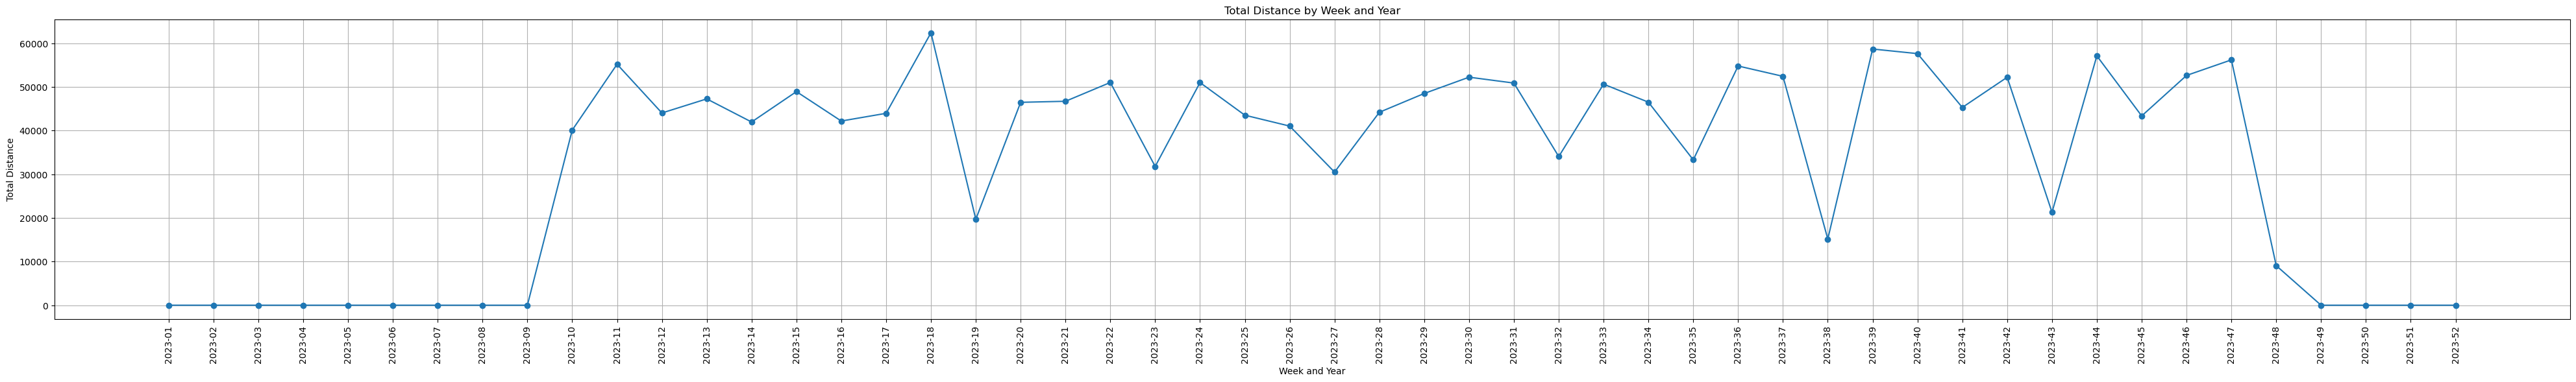

In [112]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(50, 6))
plt.plot(running_by_week_2023['week_year'], running_by_week_2023['distance'], marker='o', linestyle='-')
plt.title('Total Distance by Week and Year')
plt.xlabel('Week and Year')
plt.ylabel('Total Distance')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# 2022 Edinburgh Marathon

Analysis inspired by:
- https://levelup.gitconnected.com/data-analysis-with-strava-7251327698e3 
- https://medium.com/ordina-data/learning-from-strava-897b43751801

### Training - January to May 2022

In [193]:
# Convert date strings to datetime objects
activities['start_datetime'] = pd.to_datetime(activities['start_date_local'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)

# filter activities to running only 
mara_runs = activities[(activities['sport_type'] == 'Run')]

# Filter data between two dates
mara_runs = mara_runs.query("start_datetime >= '2022-01-01 00:00:00+00:00' \
                       and start_datetime < '2022-06-01 00:00:00+00:00'")

#filtering columns 
selected_columns = ['distance', 'moving_time', 'elapsed_time',
                    'total_elevation_gain', 'type','sport_type', 'id', 'start_date',
                    'start_date_local','location_country', 'achievement_count', 'kudos_count',
                    'comment_count','athlete_count', 'start_latlng',
                    'end_latlng', 'average_speed', 'max_speed', 'average_cadence',
                    'average_heartrate', 'max_heartrate', 'elev_high','elev_low',
                    'upload_id', 'external_id', 'pr_count', 'map.summary_polyline']
df = mara_runs[selected_columns]

generated some data from the date, completed some null fields with zero values, label unknown or with the average and, finally , I generated some data, standardizing the distance in kilometers and the time in minutes. as per https://levelup.gitconnected.com/data-analysis-with-strava-7251327698e3

In [194]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'], errors='coerce')
df = df.sort_values(by='start_date_local')

df['weekday'] = df['start_date_local'].map(lambda x: x.weekday)
df['week'] = df['start_date_local'].map(lambda x: x.week)
#replacing 52 with 1 as 2022-01-02 is recording as week 52 rather than 1
df['week'] = df['week'].replace(52, 1)
df['start_time'] = df['start_date_local'].dt.time
df['start_time'] = df['start_time'].astype(str)
df['start_date'] = df['start_date_local'].dt.date

df = df.drop('start_date_local', 1)
df.head()

C:\Users\EMoses\AppData\Local\Temp\ipykernel_4712\2999094376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date_local'] = pd.to_datetime(df['start_date_local'], errors='coerce')
C:\Users\EMoses\AppData\Local\Temp\ipykernel_4712\2999094376.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df['start_date_local'].map(lambda x: x.week)
C:\Users\EMoses\AppData\Local\Temp\ipykernel_4712\2999094376.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'la

,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,...,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,week,start_time
554,10361.6,2690,2723,27.1,Run,Run,6459124709,2022-01-02,None,0,...,NaN,16.4,3.9,6867524859,0c9bb806-8b7a-47c0-993c-6ba98242784c-activity.fit,0,kw`yHtv|@PCBEHo@Cg@Gw@@ACg@OgAIoCUsAIuAEOKUQGS...,6,1,07:59:06
553,15109.3,3962,3962,113.6,Run,Run,6464799809,2022-01-03,None,43,...,NaN,53.7,3.9,6873635068,c90a9a47-dfeb-4d99-bef1-9509d9756ac0-activity.fit,30,yt`yHhv|@FKBm@QeD?kAQsCw@yGo@uCEk@y@eCm@{ByAmB...,0,1,07:46:00
552,10297.3,2674,2680,27.0,Run,Run,6476113110,2022-01-05,None,1,...,NaN,16.4,3.9,6885753697,616d1a55-bc0d-457e-9d66-264f1615ad44-activity.fit,0,{v`yHhv|@?DFi@?g@EyAI_BOuAImASqACk@ESU[a@Aq@Ns...,2,1,12:12:56
551,9824.5,2506,2509,13.5,Run,Run,6481112044,2022-01-06,None,21,...,NaN,11.0,4.5,6891081369,9adc9c88-e0b6-4e36-aaf4-925e12acd78f-activity.fit,12,{v`yHhv|@DABGAYDIA_@Gm@GEEiAWwBEGA_AUiDKWOOYEq...,3,1,12:05:50
550,16038.8,4238,4248,133.0,Run,Run,6494981554,2022-01-09,None,39,...,184.0,60.0,6.0,6905971422,garmin_push_8086113494,16,cw`yHhw|@B}AIwBD_AMq@M_CSaAI}@Ko@Wa@oCzAqCp@u@...,6,1,09:06:00


In [195]:
df['week']

554     1
553     1
552     1
551     1
550     1
       ..
433    21
432    21
431    21
430    21
429    21
Name: week, Length: 112, dtype: int64

In [196]:
df = df.drop(df[(df.distance < 1) & (df.type == 'Run')].index)
#df = df.drop(df[(df.distance < 1) & (df.type == 'Ride')].index)
df = df.drop(df[df.average_speed > 30].index)
df = df.reset_index(drop=True)

df['elev_high'] = df['elev_high'].fillna(value=0)
df['elev_low'] = df['elev_low'].fillna(value=0)
df['upload_id'] = df['upload_id'].fillna(value='unknown')
df['external_id'] = df['external_id'].fillna(value='unknown')
df['map.summary_polyline'] = df['map.summary_polyline'].fillna(value='unknown')
df['average_cadence'] = df['average_cadence'].fillna(value=df['average_cadence'].mean())
df['average_heartrate'] = df['average_heartrate'].fillna(value=df['average_heartrate'].mean())
df['max_heartrate'] = df['max_heartrate'].fillna(value=df['max_heartrate'].mean())

df['moving_time_minutes'] = round(df['moving_time']/60, 2)
df['distance_km'] = round(df['distance'] / 1000, 2)
df['pace'] = df['moving_time_minutes'] / df['distance_km']
df['avg_speed_kmh'] = round(60/df['pace'], 2)
df['max_speed_kmh'] = round(df['max_speed']*3.6, 2)

df['elev'] = df['elev_high'] - df['elev_low']
df['year']= df['start_date'].map(lambda x: x.year)

In [197]:
# Finally, a filter based on pace below 5 min/km was created, that is, a column was created that showed all races that had an average of 12 km/h and could use this as a response variable in future analyses.

df['pace_sub_5'] = np.where(df['pace']<=5, True, False)
df.head()

,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,...,week,start_time,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,year,pace_sub_5
0,10361.6,2690,2723,27.1,Run,Run,6459124709,2022-01-02,None,0,...,1,07:59:06,44.83,10.36,4.327220,13.87,26.72,12.5,2022,True
1,15109.3,3962,3962,113.6,Run,Run,6464799809,2022-01-03,None,43,...,1,07:46:00,66.03,15.11,4.369954,13.73,25.83,49.8,2022,True
2,10297.3,2674,2680,27.0,Run,Run,6476113110,2022-01-05,None,1,...,1,12:12:56,44.57,10.30,4.327184,13.87,28.30,12.5,2022,True
3,9824.5,2506,2509,13.5,Run,Run,6481112044,2022-01-06,None,21,...,1,12:05:50,41.77,9.82,4.253564,14.11,31.50,6.5,2022,True
4,16038.8,4238,4248,133.0,Run,Run,6494981554,2022-01-09,None,39,...,1,09:06:00,70.63,16.04,4.403367,13.63,24.44,54.0,2022,True


In [198]:
#stats on all columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance,112.0,1.350632e+04,6.798238e+03,1.092000e+03,9.799100e+03,1.037915e+04,1.524240e+04,4.285940e+04
moving_time,112.0,3.650018e+03,1.865728e+03,3.270000e+02,2.615750e+03,2.867500e+03,4.151500e+03,1.205600e+04
elapsed_time,112.0,3.722116e+03,1.913183e+03,4.650000e+02,2.625500e+03,2.880500e+03,4.151750e+03,1.217700e+04
total_elevation_gain,112.0,1.240688e+02,1.295889e+02,1.000000e+00,3.075000e+01,9.000000e+01,1.452500e+02,6.830000e+02
id,112.0,6.874174e+09,2.212321e+08,6.459125e+09,6.695213e+09,6.894770e+09,7.062036e+09,7.221393e+09
achievement_count,112.0,1.066964e+01,1.548925e+01,0.000000e+00,0.000000e+00,3.500000e+00,1.350000e+01,7.400000e+01
kudos_count,112.0,6.991071e+00,2.248104e+00,2.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,1.900000e+01
comment_count,112.0,2.321429e-01,9.584347e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
athlete_count,112.0,1.366071e+00,2.934712e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.200000e+01
average_speed,112.0,3.711580e+00,2.039802e-01,3.171000e+00,3.567250e+00,3.750500e+00,3.842750e+00,4.479000e+00


In [199]:
runs = df

In [200]:
import seaborn as sns

C:\Users\EMoses\AppData\Local\Temp\ipykernel_4712\2450363090.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  runs.groupby('weekday').mean()['moving_time_minutes'].plot.bar()


<AxesSubplot: xlabel='weekday'>

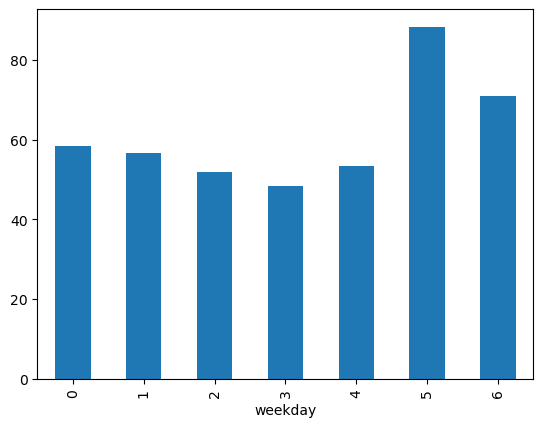

In [201]:
#Graph showing exercise time by day of the week.
runs.groupby('weekday').mean()['moving_time_minutes'].plot.bar()

C:\Users\EMoses\AppData\Local\Temp\ipykernel_4712\1245409121.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  runs.groupby('weekday').mean()['distance'].plot.bar()


<AxesSubplot: xlabel='weekday'>

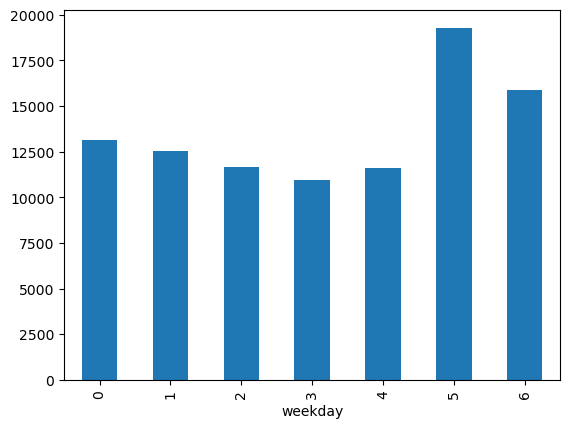

In [202]:
#Graph showing distance by day of the week.
runs.groupby('weekday').mean()['distance'].plot.bar()

C:\Users\EMoses\AppData\Local\Temp\ipykernel_4712\2141242486.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  runs.groupby('week').sum()['distance'].plot.bar()


<AxesSubplot: xlabel='week'>

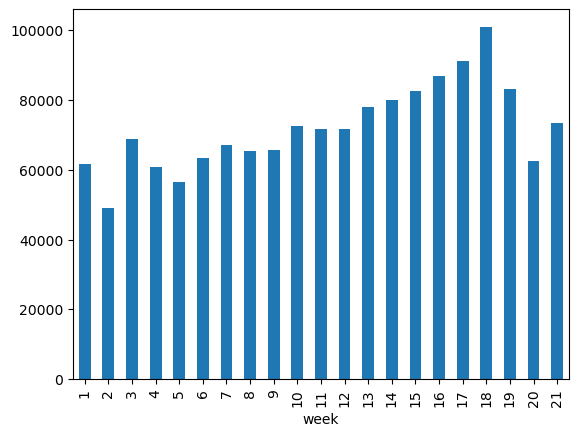

In [204]:
#Graph showing distance by week.
runs.groupby('week').sum()['distance'].plot.bar()

In [152]:
import matplotlib.dates as mdates

C:\Users\EMoses\AppData\Local\Temp\ipykernel_4712\461293906.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


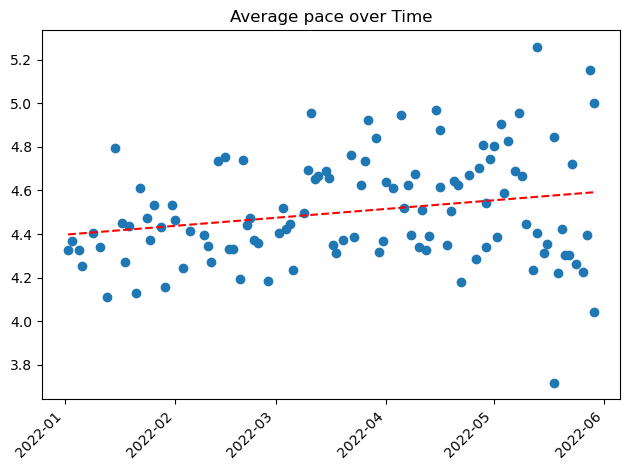

In [205]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.asarray(runs.start_date)
y = np.asarray(runs.pace)

ax1.plot_date(x, y)
ax1.set_title('Average pace over Time')

x2 = mdates.date2num(x)
z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

C:\Users\EMoses\AppData\Local\Temp\ipykernel_4712\2671813107.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


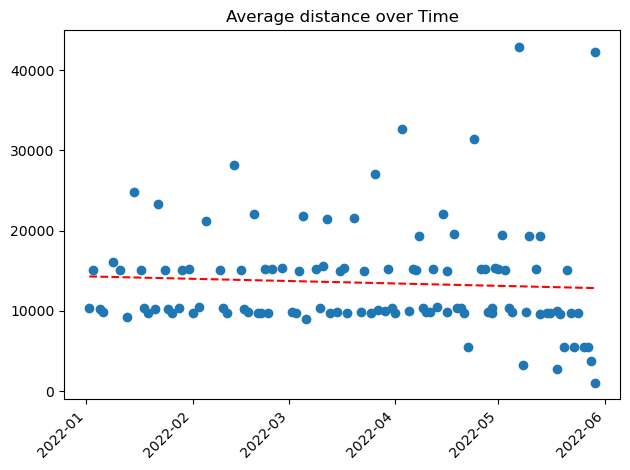

In [207]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.asarray(runs.start_date)
y = np.asarray(runs.distance)

ax1.plot_date(x, y)
ax1.set_title('Average distance over Time')

x2 = mdates.date2num(x)
z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

Race Day analysis, as per https://medium.com/ordina-data/learning-from-strava-897b43751801

- The marathon activity amounts to 5634 data points, which can be parsed to a pandas DataFrame with the gpxpy library
- Consecutively, I computed the Haversine Distance between the data points and aggregated to 1km segments. The speed per segment is plotted below; the horizontal line represents a 5:38 min/km pace.
- The plot below compares my race vs a ‘constant pace 4:00 marathon’. The intersection illustrates that my margin has evaporated at the 37.5 km mark. At this point I lacked the energy to increase pace and finished in 4:07.